This notebook assumes you are using sims_maf version >= 1.1, and have 'setup sims_maf' in your shell. 

Calculate the number of visits and coadded depth in all filters, and generate a set of combined histograms with all filters for both un-dithered and dithered versions, then compare dithered vs. nondithered directly.

In [1]:
# Import modules.
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
from lsst.sims.maf.metricBundles import MetricBundle, MetricBundleGroup, makeBundleDict

In [2]:
# Connect to databases.
runName = 'enigma_1189'
opsdb = db.OpsimDatabase(runName + '_sqlite.db')
outDir = 'allfilters_test'
resultsDb = db.ResultsDb(outDir=outDir)

Set up and run non-dithered metric bundles. Use a lower value of nside to make the notebook run faster, although at lower spatial resolution.

In [3]:
nside = 128
# Set up metrics, slicer and summaryMetrics.
m1 = metrics.CountMetric('expMJD', metricName='Nvisits')
m2 = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=nside)
summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]
# And I'll set a plotDict for the nvisits and coadded depth, because otherwise the DD fields throw the 
#  scale in the plots into too wide a range. 
#  (we could also generate plots, see this effect, then set the dict and regenerate the plots)
nvisitsPlotRanges = {'xMin':0, 'xMax':300, 'colorMin':0, 'colorMax':300, 'binsize':5}
coaddPlotRanges = {'xMin':24, 'xMax':28, 'colorMin':24, 'colorMax':28, 'binsize':0.02}

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
filterorder = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}

In [5]:
# Run metricBundles for each filter. Group sql constraints into a MetricBundleGroup.
nvisits = {}
coadd = {}
for f in filterlist:
    sqlconstraint = 'filter = "%s"' %(f)
    # Add displayDict stuff that's only useful for showMaf to put things in "nice" order.
    displayDict = {'subgroup':'Undithered', 'order':filterorder[f], 'group':'Nvisits'}
    nvisits[f] = MetricBundle(m1, slicer, sqlconstraint=sqlconstraint, runName=runName,
                             summaryMetrics=summaryMetrics, plotDict=nvisitsPlotRanges,
                             displayDict=displayDict)
    displayDict['group'] = 'Coadd'
    coadd[f] = MetricBundle(m2, slicer, sqlconstraint=sqlconstraint, runName=runName,
                           summaryMetrics=summaryMetrics, plotDict=coaddPlotRanges,
                           displayDict=displayDict)
    bdict = makeBundleDict([nvisits[f], coadd[f]])
    bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.writeAll()
    bgroup.plotAll()

Querying database with constraint filter = "u"
Found 186607 visits
Running:  ['enigma_1189_Nvisits_u_HEAL', 'enigma_1189_CoaddM5_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting.
monopole: 91.3849  dipole: lon: 59.8176, lat: 43.7646, amp: 30.7618
monopole: 26.2064  dipole: lon: 106.282, lat: 56.8209, amp: 0.405989
Plotting complete.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "u"' should be explicitly declared as text('filter = "u"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "g"' should be explicitly declared as text('filter = "g"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})



Querying database with constraint filter = "g"
Found 249108 visits
Running:  ['enigma_1189_CoaddM5_g_HEAL', 'enigma_1189_Nvisits_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting.
monopole: 27.0096  dipole: lon: 168.621, lat: -79.4714, amp: 0.155108
monopole: 85.8191  dipole: lon: 43.1916, lat: -71.1289, amp: 16.9965
Plotting complete.
Querying database with constraint filter = "r"
Found 544710 visits
Running:  ['enigma_1189_CoaddM5_r_HEAL', 'enigma_1189_Nvisits_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting.
monopole: 27.1372  dipole: lon: 82.546, lat: 26.7924, amp: 0.0524659
monopole: 191.81  dipole: lon: 60.9552, lat: -51.5504, amp: 27.362
Plotting complete.
Querying database with constraint filter = "i"
Found 545488 visits
Running:  ['enigma_1189_CoaddM5_i_HEAL', 'enigma_1189_Nvisits_i_HEAL']
Completed metric

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "r"' should be explicitly declared as text('filter = "r"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "z"' should be explicitly declared as text('filter = "z"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})



Querying database with constraint filter = "z"
Found 497113 visits
Running:  ['enigma_1189_CoaddM5_z_HEAL', 'enigma_1189_Nvisits_z_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting.
monopole: 25.2535  dipole: lon: -15.7394, lat: -46.2239, amp: 0.0729554
monopole: 173.642  dipole: lon: 48.0557, lat: -54.948, amp: 29.0429
Plotting complete.
Querying database with constraint filter = "y"
Found 446281 visits
Running:  ['enigma_1189_CoaddM5_y_HEAL', 'enigma_1189_Nvisits_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting.
monopole: 24.4725  dipole: lon: 91.7992, lat: 67.6547, amp: 0.578148
monopole: 231.688  dipole: lon: 76.236, lat: 62.6615, amp: 88.75
Plotting complete.


/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "y"' should be explicitly declared as text('filter = "y"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


In [6]:
print 'Nvisits --'
for f in filterlist:
    print nvisits[f].summaryValues
print 'Coadd --'
for f in filterlist:
    print coadd[f].summaryValues

Nvisits --
{'25th%ile': 62.0, 'Rms': 243.53994420480828, '75th%ile': 64.0, 'Min': 30.0, 'Max': 5563.0, 'Median': 63.0, 'Mean': 81.368397020632969}
{'25th%ile': 60.0, 'Rms': 89.446442297215782, '75th%ile': 90.0, 'Min': 30.0, 'Max': 2331.0, 'Median': 88.0, 'Mean': 91.827554070122446}
{'25th%ile': 92.0, 'Rms': 190.07447530315054, '75th%ile': 205.0, 'Min': 30.0, 'Max': 4739.0, 'Median': 200.0, 'Mean': 200.73116958218881}
{'25th%ile': 92.0, 'Rms': 190.45734656362725, '75th%ile': 206.0, 'Min': 30.0, 'Max': 4746.0, 'Median': 200.0, 'Mean': 201.02002313141534}
{'25th%ile': 80.0, 'Rms': 219.58316081260682, '75th%ile': 184.0, 'Min': 30.0, 'Max': 5733.0, 'Median': 182.0, 'Mean': 183.17473856681605}
{'25th%ile': 177.0, 'Rms': 186.1208778761669, '75th%ile': 183.0, 'Min': 30.0, 'Max': 4267.0, 'Median': 181.0, 'Mean': 194.82424398086053}
Coadd --
{'25th%ile': 26.060390199413391, 'Rms': 0.44536578191761966, '75th%ile': 26.221096366616706, 'Min': 24.333663574714429, 'Max': 28.582055113597846, 'Median':

Now let's try to combine the histograms.

In [7]:
# Set more complicated plot labels directly in the bundles.
for f in filterlist:
    nvisits[f].setPlotDict({'label':'%s  %1.f/%.1f/%1.f' %(f, nvisits[f].summaryValues['25th%ile'], 
                                                    nvisits[f].summaryValues['Median'], 
                                                   nvisits[f].summaryValues['75th%ile'])})
    coadd[f].setPlotDict({'label':'%s %.2f/%.2f/%.2f' %(f, coadd[f].summaryValues['25th%ile'],
                                                 coadd[f].summaryValues['Median'],
                                                 coadd[f].summaryValues['75th%ile'])})

2

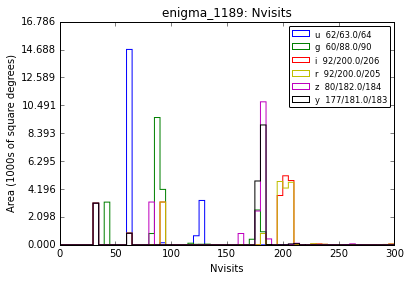

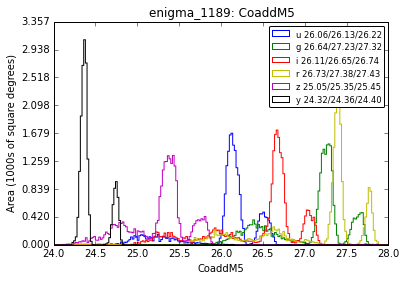

In [8]:
# Set up the plotHandler.
ph = plots.PlotHandler(outDir=outDir, resultsDb=resultsDb)
# Instantiate the healpix histogram plotter, since we'll use it a lot.
healpixhist = plots.HealpixHistogram()
ph.setMetricBundles(nvisits)
# Add min/max values to the plots, which will be used for the combo histogram for nvisits.
ph.setPlotDict(nvisitsPlotRanges)
ph.plot(plotFunc=healpixhist)
# And generate the coadd combo histogram too. 
ph.setMetricBundles(coadd)
ph.setPlotDict(coaddPlotRanges)
ph.plot(plotFunc=healpixhist)

In [9]:
# Set up to calculate the same metrics, but using the dithered pointings.
slicer = slicers.HealpixSlicer(nside=nside, lonCol='ditheredRA', latCol='ditheredDec')

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [10]:
# run dithered bundles
nvisitsDith = {}
coaddDith = {}
for f in filterlist:
    sqlconstraint = 'filter = "%s"' %(f)
    displayDict = {'subgroup':'Dithered', 'order':filterorder[f], 'group':'Nvisits'}
    nvisitsDith[f] = MetricBundle(m1, slicer, sqlconstraint=sqlconstraint, runName=runName,
                                  metadata = '%s Dithered' %(f), 
                                  summaryMetrics=summaryMetrics, plotDict=nvisitsPlotRanges,
                                 displayDict=displayDict)
    displayDict['group'] = 'Coadd'
    coaddDith[f] = MetricBundle(m2, slicer, sqlconstraint=sqlconstraint, runName=runName,
                                metadata = '%s Dithered' %(f), 
                                summaryMetrics=summaryMetrics, plotDict=coaddPlotRanges,
                               displayDict=displayDict)
    bdict = makeBundleDict([nvisitsDith[f], coaddDith[f]])
    bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.writeAll()
    bgroup.plotAll()

Querying database with constraint filter = "u"
Found 186607 visits
Running:  ['enigma_1189_Nvisits_u_Dithered_HEAL', 'enigma_1189_CoaddM5_u_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting.
monopole: 82.5154  dipole: lon: 59.1989, lat: 18.9626, amp: 22.9607
monopole: 26.0789  dipole: lon: 105.556, lat: 17.9822, amp: 0.240981
Plotting complete.
Querying database with constraint filter = "g"
Found 249108 visits
Running:  ['enigma_1189_CoaddM5_g_Dithered_HEAL', 'enigma_1189_Nvisits_g_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Re-saving metric bundles.
Plotting.
monopole: 26.9505  dipole: lon: 125.62, lat: -80.5788, amp: 0.316914
monopole: 81.2958  dipole: lon: 57.2192, lat: -72.907, amp: 24.5411
Plotting complete.
Querying database with constraint filter = "r"
Found 544710 visits
Running:  ['enigma_1189_CoaddM5_r_Dithered_HEAL', 'en

In [11]:
# set plot labels for dithered bundles
for f in filterlist:
    nvisitsDith[f].setPlotDict({'label':'%s dithered  %1.f/%.1f/%1.f' %(f, nvisitsDith[f].summaryValues['25th%ile'], 
                                                    nvisitsDith[f].summaryValues['Median'], 
                                                   nvisitsDith[f].summaryValues['75th%ile'])})
    coaddDith[f].setPlotDict({'label':'%s dithered %.2f/%.2f/%.2f' %(f, coaddDith[f].summaryValues['25th%ile'],
                                                 coaddDith[f].summaryValues['Median'],
                                                 coaddDith[f].summaryValues['75th%ile'])})    

2

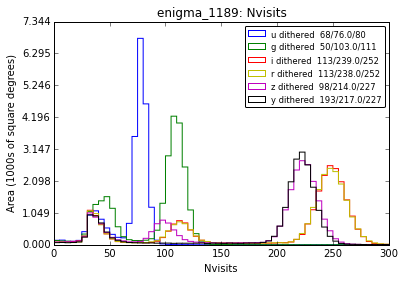

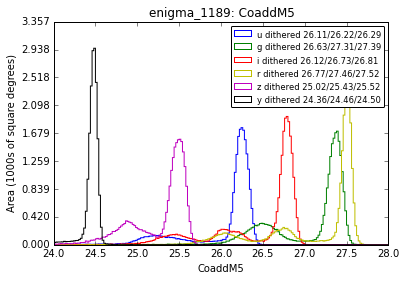

In [12]:
# Plot all filters, dithered version
ph.setMetricBundles(nvisitsDith)
# Add min/max values to the plots, which will be used for the combo histogram.
ph.setPlotDict(nvisitsPlotRanges)
ph.plot(plotFunc=healpixhist)
ph.setMetricBundles(coaddDith)
ph.setPlotDict(coaddPlotRanges)
ph.plot(plotFunc=healpixhist)

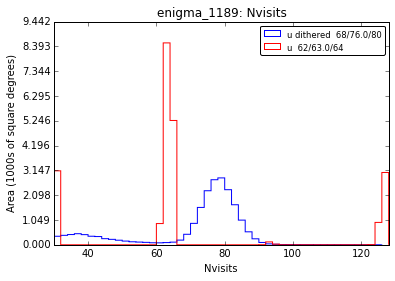

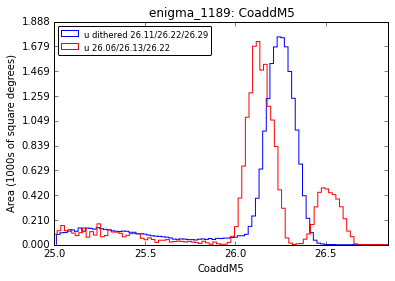

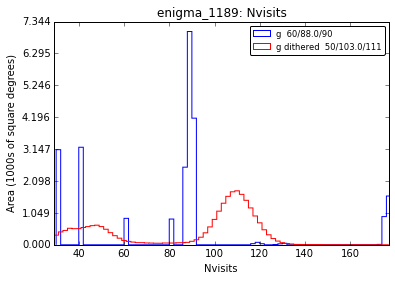

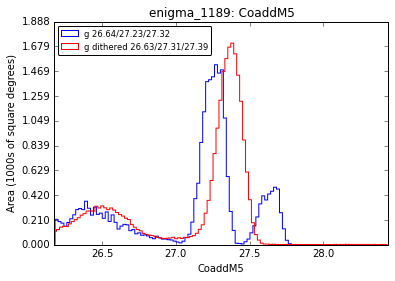

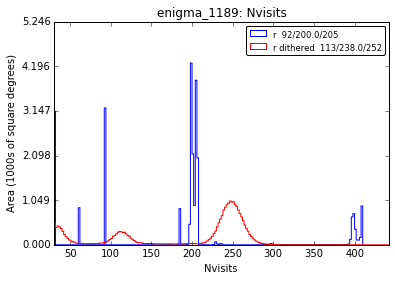

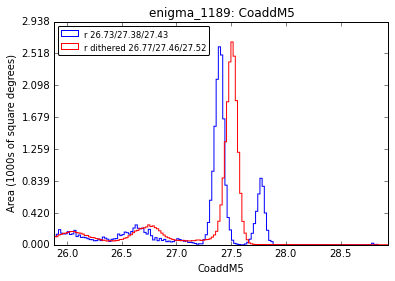

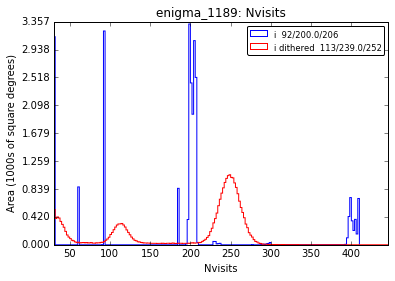

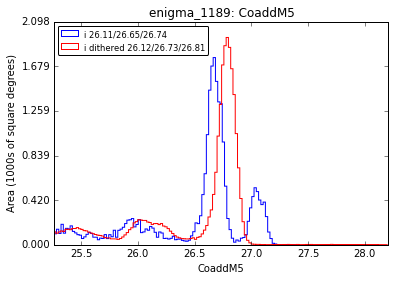

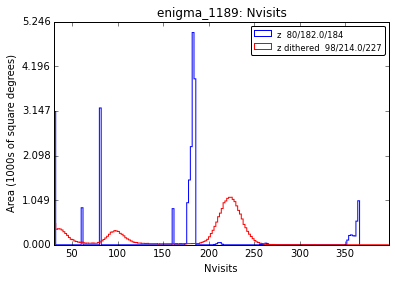

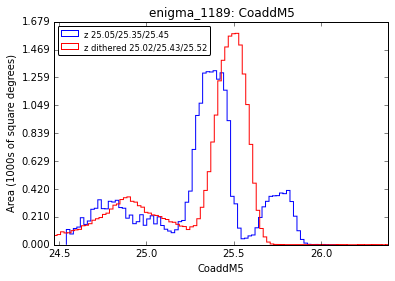

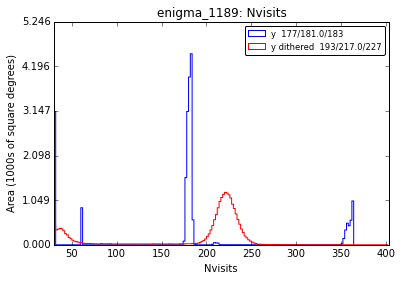

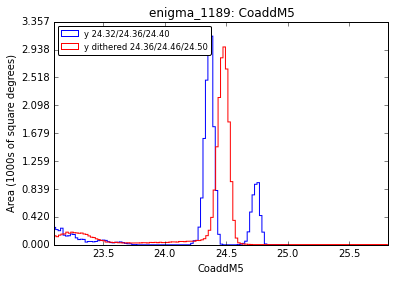

In [13]:
# plot dithered vs. non-dithered. Note that this resets xMin/xMax, so that they are set dynamically for each plot.
for f in filterlist:
    ph.setMetricBundles([nvisits[f], nvisitsDith[f]])
    ph.plot(plotFunc=healpixhist, plotDict={'percentileClip':96, 'binsize':2, 'colors':['b', 'r']})
    ph.setMetricBundles([coadd[f], coaddDith[f]])
    ph.plot(plotFunc=healpixhist, plotDict={'legendloc':'upper left', 'binsize':0.02, 
                                            'colors':['b', 'r'], 'percentileClip':96})

In [14]:
# Save some information on the opsim run itself to disk. 
#  This helps 'showMaf' look pretty and tracks information about the opsim run.
from lsst.sims.maf.utils import writeConfigs
writeConfigs(opsdb, outDir)